### This is the topic modelling code for NMF, for specifically the reviews in part 1, then tips in part 2 ### 

In [2]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction import text
from sklearn.decomposition import NMF
import numpy as np
import pickle 
import warnings  
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline

import nltk 
# from nltk.corpus import stopwords
from nltk import word_tokenize, pos_tag
# from nltk.stem import PorterStemmer
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/vaishnavisingh/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/vaishnavisingh/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
df_orig = pd.read_csv("/Users/vaishnavisingh/Desktop/unique_data.csv")


In [220]:
df_orig.shape


(102326, 35)

In [221]:
df_orig.head()

## this is the original preprocessed table-like form of the data


,review_stars,review_date,review_text,review_useful,review_funny,review_cool,user_name,user_review_count,user_yelping_since,user_useful,...,user_compliment_photos,tip_text,tip_date,tip_compliment_count,business_name,business_state,business_stars,business_review_count,business_categories,business_type
0,3.0,2014-09-10 23:19:21,Yet again.. Disappointed. Now they don't have bruschetta. Really bad deal. Stop placating people. Wrong deal. Bad service all the sudden. Never really bad before. Really disappointed,0,1,1,Alison,146,2011-12-05 22:07:12,220,...,0,Yum!!! Thanks for an amazing experience,2013-10-04 22:52:17,0,Keswick Tavern,PA,3.5,159,"Bars, Greek, Restaurants, Nightlife, Beer, Wine & Spirits, American (New), Food",F&B
1,4.0,2013-10-30 20:03:09,"Ok really? When I see a bar that smells like mold and smoke have a higher rating I get really pissed off. The KT is GOOD! They got rid of scum bag, dead wright staff, the good is good and the drinks are great. It's a bar, it's not Gordon Ramsey's London Grille. Everyone deserves a second chance! Get back in and update your reviews guys, I know you won't be disappointed, at least that's how I felt on my last visit.",5,0,1,Alison,146,2011-12-05 22:07:12,220,...,0,Yum!!! Thanks for an amazing experience,2013-10-04 22:52:17,0,Keswick Tavern,PA,3.5,159,"Bars, Greek, Restaurants, Nightlife, Beer, Wine & Spirits, American (New), Food",F&B
2,3.0,2013-08-08 15:11:13,"The K-T is a decent place. the bartenders are VERY rude however. I mean you're a bartender, you provide a SERVICE- be PLEASANT! The drinks were fine (all top shelf now). The food that we got well, mixed reviews.... Shrimp Bruschetta was AWESOME, spinach and artichoke dip was huge, not enough chips and they were a little greasy...maybe pita bread instead?! Nachos...eh, not so much. All in all, the K-T has come a long way, they need to come a little longer though.",1,1,1,Alison,146,2011-12-05 22:07:12,220,...,0,Yum!!! Thanks for an amazing experience,2013-10-04 22:52:17,0,Keswick Tavern,PA,3.5,159,"Bars, Greek, Restaurants, Nightlife, Beer, Wine & Spirits, American (New), Food",F&B
3,3.0,2014-01-25 19:21:47,Food four stars!!!!! Bartender shorting me 10 dollars plus 45 cents in change is a negative 8. So far he's not coming back to our part of the bar. See now I'm pissed. I gave a fairly neg review before and then super positives. Now this. I'm angry short chubby brown hair balding. He came back after we chased him down. Ok but still no change? Odd,0,1,0,Alison,146,2011-12-05 22:07:12,220,...,0,Yum!!! Thanks for an amazing experience,2013-10-04 22:52:17,0,Keswick Tavern,PA,3.5,159,"Bars, Greek, Restaurants, Nightlife, Beer, Wine & Spirits, American (New), Food",F&B
4,4.0,2014-01-28 17:12:32,"OK they get the star back for service. Even after my tirade- I was angry and you never know about people- my bartender (yes, he's now mine) sent me a message. I felt like a jerk because he was busy and I didn't take that into consideration. I also, in my anger, sort of bashed him but I was just describing him ...but I was jerky. I had Duck spring rolls-get them they are awesome. Jim had wings-really good. Now that my ""three faces of Eve"" moment is gone, keep going to the KT. They are good people who acknowledge mistakes and are nice about some skinny witch at the end of the bar.",1,1,1,Alison,146,2011-12-05 22:07:12,220,...,0,Yum!!! Thanks for an amazing experience,2013-10-04 22:52:17,0,Keswick Tavern,PA,3.5,159,"Bars, Greek, Restaurants, Nightlife, Beer, Wine & Spirits, American (New), Food",F&B


In [6]:

# Load the dataset with only the desired columns
df = pd.read_csv("/Users/vaishnavisingh/Desktop/unique_data.csv", usecols=["review_text"])

# Now df contains only the "review_text" and "tip_text" columns
df.head()

## There's so many duplicates
unique_df = df.drop_duplicates(subset='review_text')


unique_df.head()


,review_text
0,Yet again.. Disappointed. Now they don't have ...
1,Ok really? When I see a bar that smells like ...
2,The K-T is a decent place. the bartenders are...
3,Food four stars!!!!! Bartender shorting me 10 ...
4,OK they get the star back for service. Even a...


In [7]:
pd.set_option('max_colwidth', 1000)
pd.options.display.max_rows = 500

In [8]:
# Create a doc id for merging the results back to the original file 
unique_df.insert(0, 'Doc_Id', range(0, 0 + len(df_orig)))
unique_df.head()

,Doc_Id,review_text
0,0,Yet again.. Disappointed. Now they don't have bruschetta. Really bad deal. Stop placating people. Wrong deal. Bad service all the sudden. Never really bad before. Really disappointed
1,1,"Ok really? When I see a bar that smells like mold and smoke have a higher rating I get really pissed off. The KT is GOOD! They got rid of scum bag, dead wright staff, the good is good and the drinks are great. It's a bar, it's not Gordon Ramsey's London Grille. Everyone deserves a second chance! Get back in and update your reviews guys, I know you won't be disappointed, at least that's how I felt on my last visit."
2,2,"The K-T is a decent place. the bartenders are VERY rude however. I mean you're a bartender, you provide a SERVICE- be PLEASANT! The drinks were fine (all top shelf now). The food that we got well, mixed reviews.... Shrimp Bruschetta was AWESOME, spinach and artichoke dip was huge, not enough chips and they were a little greasy...maybe pita bread instead?! Nachos...eh, not so much. All in all, the K-T has come a long way, they need to come a little longer though."
3,3,Food four stars!!!!! Bartender shorting me 10 dollars plus 45 cents in change is a negative 8. So far he's not coming back to our part of the bar. See now I'm pissed. I gave a fairly neg review before and then super positives. Now this. I'm angry short chubby brown hair balding. He came back after we chased him down. Ok but still no change? Odd
4,4,"OK they get the star back for service. Even after my tirade- I was angry and you never know about people- my bartender (yes, he's now mine) sent me a message. I felt like a jerk because he was busy and I didn't take that into consideration. I also, in my anger, sort of bashed him but I was just describing him ...but I was jerky. I had Duck spring rolls-get them they are awesome. Jim had wings-really good. Now that my ""three faces of Eve"" moment is gone, keep going to the KT. They are good people who acknowledge mistakes and are nice about some skinny witch at the end of the bar."


In [9]:
unique_df.to_pickle('/Users/vaishnavisingh/Desktop//unique_df.pkl')
df = unique_df.loc[:,['Doc_Id', 'review_text']]



In [10]:
# Work with only nouns. Use NLTK to get only nouns in the corpus
def nouns(text):
    is_noun = lambda pos: pos[:2] == 'NN'
    tokenized = word_tokenize(text)
    all_nouns = [word.lower() for (word, pos) in pos_tag(tokenized) if is_noun(pos)]
    return ' '.join(all_nouns)  # Convert all words to lowercase
df['data_nouns'] = pd.DataFrame(df.review_text.apply(nouns))
df.head()


,Doc_Id,review_text,data_nouns
0,0,Yet again.. Disappointed. Now they don't have bruschetta. Really bad deal. Stop placating people. Wrong deal. Bad service all the sudden. Never really bad before. Really disappointed,disappointed deal people deal bad service never
1,1,"Ok really? When I see a bar that smells like mold and smoke have a higher rating I get really pissed off. The KT is GOOD! They got rid of scum bag, dead wright staff, the good is good and the drinks are great. It's a bar, it's not Gordon Ramsey's London Grille. Everyone deserves a second chance! Get back in and update your reviews guys, I know you won't be disappointed, at least that's how I felt on my last visit.",ok bar mold smoke rating kt bag staff drinks bar gordon ramsey london grille everyone chance get reviews guys visit
2,2,"The K-T is a decent place. the bartenders are VERY rude however. I mean you're a bartender, you provide a SERVICE- be PLEASANT! The drinks were fine (all top shelf now). The food that we got well, mixed reviews.... Shrimp Bruschetta was AWESOME, spinach and artichoke dip was huge, not enough chips and they were a little greasy...maybe pita bread instead?! Nachos...eh, not so much. All in all, the K-T has come a long way, they need to come a little longer though.",k-t place bartenders very bartender drinks shelf food reviews shrimp bruschetta awesome spinach dip chips greasy bread nachos eh k-t way
3,3,Food four stars!!!!! Bartender shorting me 10 dollars plus 45 cents in change is a negative 8. So far he's not coming back to our part of the bar. See now I'm pissed. I gave a fairly neg review before and then super positives. Now this. I'm angry short chubby brown hair balding. He came back after we chased him down. Ok but still no change? Odd,food stars bartender dollars cents change part bar review positives chubby hair ok change odd
4,4,"OK they get the star back for service. Even after my tirade- I was angry and you never know about people- my bartender (yes, he's now mine) sent me a message. I felt like a jerk because he was busy and I didn't take that into consideration. I also, in my anger, sort of bashed him but I was just describing him ...but I was jerky. I had Duck spring rolls-get them they are awesome. Jim had wings-really good. Now that my ""three faces of Eve"" moment is gone, keep going to the KT. They are good people who acknowledge mistakes and are nice about some skinny witch at the end of the bar.",star service bartender message jerk consideration anger sort jerky duck spring jim eve moment kt people mistakes witch end bar


In [11]:
# Further cleaning, removing stopwords, lemmatizing
import re
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
my_stop_words = ENGLISH_STOP_WORDS
temp =[]

from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

for sentence in df['review_text']:
    sentence = sentence.lower()
    cleaner = re.compile('<.*?>')
    sentence = re.sub(cleaner, ' ', sentence)  # Remove html tags
    sentence = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    sentence = re.sub(r'[.|,|)|(|\|/]',r' ',sentence) # removing puntuations
    
    words = [lemmatizer.lemmatize(word) for word in sentence.split() if word not in my_stop_words] # removing stopwords and lemm
    temp.append(words)
    
final_X = temp

In [12]:
final_X[:2]

[['disappointed',
  'dont',
  'bruschetta',
  'really',
  'bad',
  'deal',
  'stop',
  'placating',
  'people',
  'wrong',
  'deal',
  'bad',
  'service',
  'sudden',
  'really',
  'bad',
  'really',
  'disappointed'],
 ['ok',
  'really',
  'bar',
  'smell',
  'like',
  'mold',
  'smoke',
  'higher',
  'rating',
  'really',
  'pissed',
  'kt',
  'good',
  'got',
  'rid',
  'scum',
  'bag',
  'dead',
  'wright',
  'staff',
  'good',
  'good',
  'drink',
  'great',
  'bar',
  'gordon',
  'ramseys',
  'london',
  'grille',
  'deserves',
  'second',
  'chance',
  'update',
  'review',
  'guy',
  'know',
  'wont',
  'disappointed',
  'thats',
  'felt',
  'visit']]

In [13]:
sent = []
for row in final_X:
    sequ = ''
    for word in row:
        sequ = sequ + ' ' + word
    sent.append(sequ)
final_X = sent

In [76]:
print(final_X[:2])
# remove unwanted characters, numbers and symbols 
df['cleaned'] = final_X
df.head()


[' disappointed dont bruschetta really bad deal stop placating people wrong deal bad service sudden really bad really disappointed', ' ok really bar smell like mold smoke higher rating really pissed kt good got rid scum bag dead wright staff good good drink great bar gordon ramseys london grille deserves second chance update review guy know wont disappointed thats felt visit']


,Doc_Id,review_text,data_nouns,cleaned
0,0,Yet again.. Disappointed. Now they don't have bruschetta. Really bad deal. Stop placating people. Wrong deal. Bad service all the sudden. Never really bad before. Really disappointed,disappointed deal people deal bad service never,disappointed dont bruschetta really bad deal stop placating people wrong deal bad service sudden really bad really disappointed
1,1,"Ok really? When I see a bar that smells like mold and smoke have a higher rating I get really pissed off. The KT is GOOD! They got rid of scum bag, dead wright staff, the good is good and the drinks are great. It's a bar, it's not Gordon Ramsey's London Grille. Everyone deserves a second chance! Get back in and update your reviews guys, I know you won't be disappointed, at least that's how I felt on my last visit.",ok bar mold smoke rating kt bag staff drinks bar gordon ramsey london grille everyone chance get reviews guys visit,ok really bar smell like mold smoke higher rating really pissed kt good got rid scum bag dead wright staff good good drink great bar gordon ramseys london grille deserves second chance update review guy know wont disappointed thats felt visit
2,2,"The K-T is a decent place. the bartenders are VERY rude however. I mean you're a bartender, you provide a SERVICE- be PLEASANT! The drinks were fine (all top shelf now). The food that we got well, mixed reviews.... Shrimp Bruschetta was AWESOME, spinach and artichoke dip was huge, not enough chips and they were a little greasy...maybe pita bread instead?! Nachos...eh, not so much. All in all, the K-T has come a long way, they need to come a little longer though.",k-t place bartenders very bartender drinks shelf food reviews shrimp bruschetta awesome spinach dip chips greasy bread nachos eh k-t way,k-t decent place bartender rude mean youre bartender provide service- pleasant drink fine shelf food got mixed review shrimp bruschetta awesome spinach artichoke dip huge chip little greasy maybe pita bread instead nacho eh k-t come long way need come little longer
3,3,Food four stars!!!!! Bartender shorting me 10 dollars plus 45 cents in change is a negative 8. So far he's not coming back to our part of the bar. See now I'm pissed. I gave a fairly neg review before and then super positives. Now this. I'm angry short chubby brown hair balding. He came back after we chased him down. Ok but still no change? Odd,food stars bartender dollars cents change part bar review positives chubby hair ok change odd,food star bartender shorting 10 dollar plus 45 cent change negative 8 far he coming bar im pissed gave fairly neg review super positive im angry short chubby brown hair balding came chased ok change odd
4,4,"OK they get the star back for service. Even after my tirade- I was angry and you never know about people- my bartender (yes, he's now mine) sent me a message. I felt like a jerk because he was busy and I didn't take that into consideration. I also, in my anger, sort of bashed him but I was just describing him ...but I was jerky. I had Duck spring rolls-get them they are awesome. Jim had wings-really good. Now that my ""three faces of Eve"" moment is gone, keep going to the KT. They are good people who acknowledge mistakes and are nice about some skinny witch at the end of the bar.",star service bartender message jerk consideration anger sort jerky duck spring jim eve moment kt people mistakes witch end bar,ok star service tirade- angry know people- bartender yes he sent message felt like jerk busy didnt consideration anger sort bashed just describing jerky duck spring rolls-get awesome jim wings-really good face eve moment gone going kt good people acknowledge mistake nice skinny witch end bar


In [183]:
df.to_pickle('data_prep.pkl')

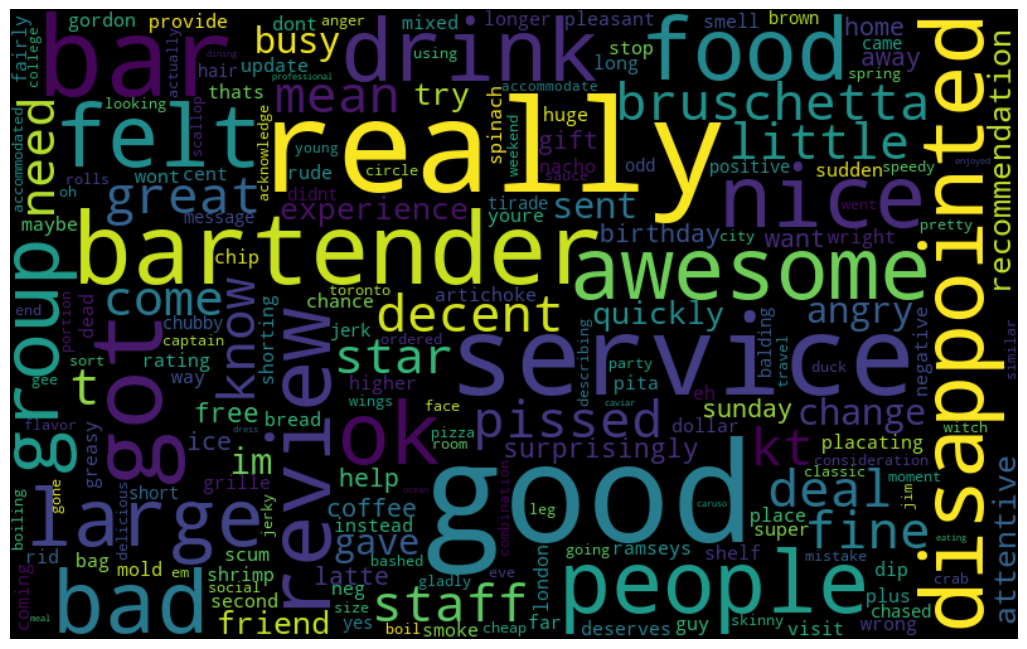

In [15]:
from wordcloud import WordCloud 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(str(df['cleaned'])) 
plt.figure(1,figsize=(13, 10))
fig=plt.figure(1)
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()
fig.savefig('/Users/vaishnavisingh/Desktop/wordcloud.png')

In [16]:
#Use CountVectorizer to get bigrams to visualize
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_df = 0.95, min_df = 2, stop_words= 'english', max_features=10000, ngram_range=(1,3))
X = cv.fit_transform(df['cleaned'])

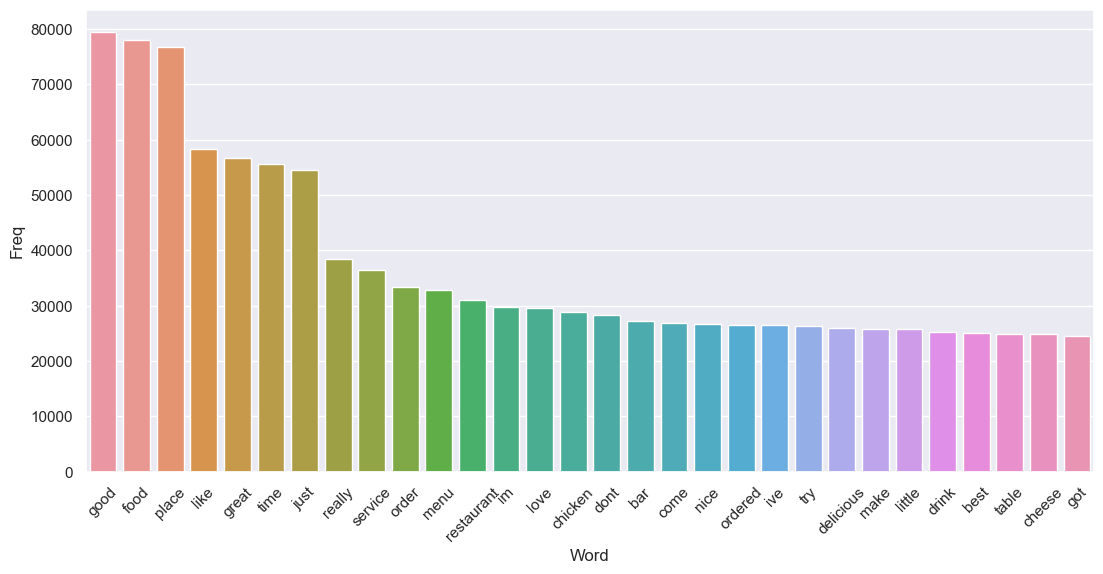

In [17]:
# Most frequently occuring words
def get_top_n_words(corpus,n=None):
    vec = CountVectorizer().fit(df['cleaned'])
    bag_of_words=vec.transform(df['cleaned'])
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word , idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
# Convert most freq words to datafame for visuals

top_words = get_top_n_words(df['cleaned'], n=30)
top_df = pd.DataFrame(top_words)
top_df.columns = ['Word', 'Freq']

# barplot of most freq words
import seaborn as sns
sns.set(rc={'figure.figsize':(13,6)})
g = sns.barplot(x='Word', y='Freq', data=top_df)
g.set_xticklabels(g.get_xticklabels(), rotation=45)
fig = g.get_figure()
fig.savefig("/Users/vaishnavisingh/Desktop/sns_output.png")


             Bi-gram  Freq
0          ice cream  6103
1       food service  3365
2       service food  2934
3   customer service  2893
4        new orleans  2718
5        parking lot  2536
6         mac cheese  1960
7         place food  1860
8           st louis  1601
9           bar area  1548
10         food food  1544
11    beer selection  1451
12       dining room  1400
13      lunch dinner  1384
14        food place  1334
15       coffee shop  1312
16      quality food  1241
17        menu items  1158
18         time time  1151
19         time food  1150
20       chips salsa  1141
21        drive thru  1118
22       food drinks  1099
23        order food  1091
24       place place  1083
25      cream cheese  1056
26     grocery store  1052
27     peanut butter   998
28          bar food   989
29      friday night   989


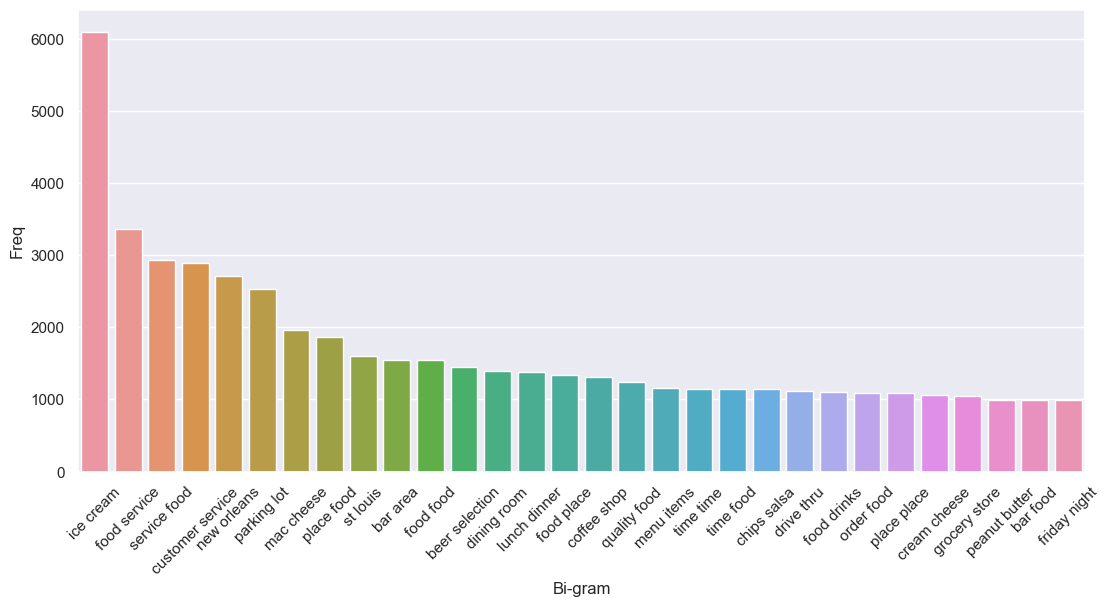

In [18]:
# Most frequently Co-occuring words
def get_top_n2_words(corpus,n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),max_features=2000).fit(df['data_nouns'])
    bag_of_words=vec1.transform(df['data_nouns'])
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word , idx in vec1.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
# Convert most freq words to datafame for visuals

top2_words = get_top_n2_words(df['data_nouns'], n=30)
top2_df = pd.DataFrame(top2_words)
top2_df.columns = ['Bi-gram', 'Freq']

# for bigram wordcloud
top100_words = get_top_n2_words(df['data_nouns'], n=100)
top100_df = pd.DataFrame(top100_words)
top100_df.columns = ['Bi-gram', 'Freq']
print(top2_df)

# barplot of most freq words
import seaborn as sns
sns.set(rc={'figure.figsize':(13,6)})
h = sns.barplot(x='Bi-gram', y='Freq', data=top2_df)
h.set_xticklabels(h.get_xticklabels(), rotation=45)
fig = h.get_figure()
fig.savefig("/Users/vaishnavisingh/Desktop/sns_output_bigrams.png")

In [19]:
top100_df.head()


,Bi-gram,Freq
0,ice cream,6103
1,food service,3365
2,service food,2934
3,customer service,2893
4,new orleans,2718


In [20]:
top100_df['Bi_gram'] = top100_df['Bi-gram'].str.replace(' ','_')
top100_df.head()

,Bi-gram,Freq,Bi_gram
0,ice cream,6103,ice_cream
1,food service,3365,food_service
2,service food,2934,service_food
3,customer service,2893,customer_service
4,new orleans,2718,new_orleans


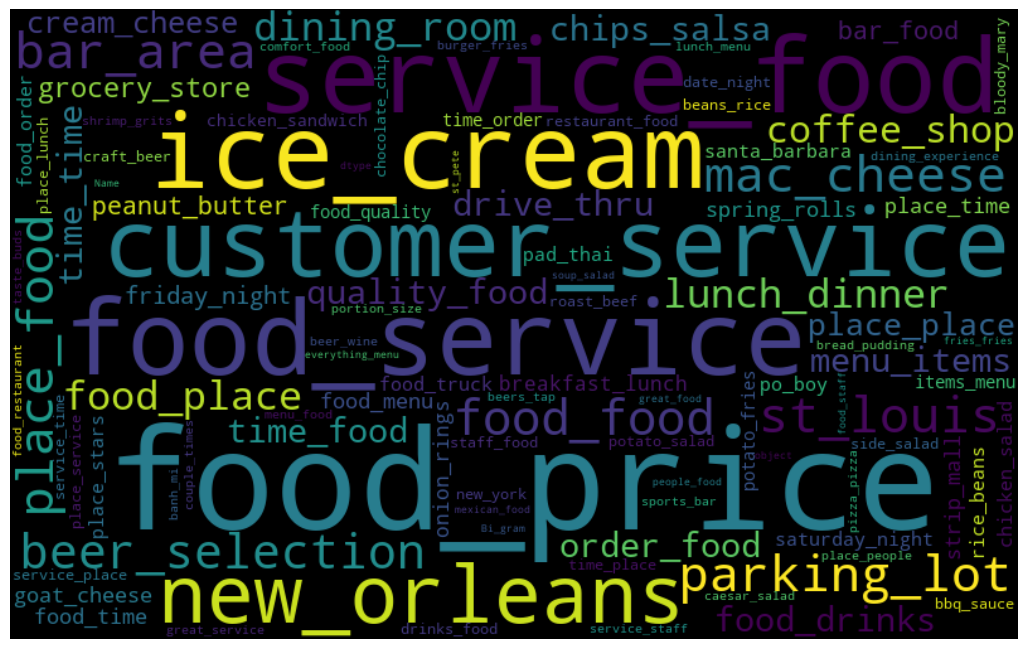

In [21]:
from wordcloud import WordCloud 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(str(top100_df['Bi_gram'])) 
plt.figure(1,figsize=(13, 10))
fig=plt.figure(1)
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()
fig.savefig('/Users/vaishnavisingh/Desktop/wordcloud_bigram')

In [46]:
no_features = 50000


### Term vectorization term weighting: ###




In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df = 0.95, min_df = 2, stop_words= 'english', max_features=no_features, ngram_range=(1,1),
                                  analyzer='word')
tfidf = tfidf_vectorizer.fit_transform(df['cleaned'])
# get the feature names
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()


In [48]:
print('Vocabulary has %d distinct terms' % len(tfidf_feature_names))


Vocabulary has 43892 distinct terms


In [49]:
import operator
def rank_terms( tfidf, tfidf_feature_names ):
    # get the sums over each column
    sums = tfidf.sum(axis=0)
    # map weights to the terms
    weights = {}
    for col, term in enumerate(tfidf_feature_names):
        weights[term] = sums[0,col]
    # rank the terms by their weight over all documents
    return sorted(weights.items(), key=operator.itemgetter(1), reverse=True)

In [50]:
ranking = rank_terms(tfidf, tfidf_feature_names)
for i, pair in enumerate( ranking[0:20] ):
    print( "%02d. %s (%.0f)" % ( i+1, pair[0], pair[1] ) )

01. good (3166)
02. food (3127)
03. place (3064)
04. great (2811)
05. time (2307)
06. like (2232)
07. just (2131)
08. service (1967)
09. really (1833)
10. love (1745)
11. chicken (1632)
12. order (1620)
13. menu (1570)
14. pizza (1534)
15. nice (1521)
16. restaurant (1516)
17. bar (1489)
18. best (1485)
19. delicious (1478)
20. im (1450)


### Reviews having NMF model fitting ###


In [110]:
no_topics = 30

In [111]:
nmf=NMF(n_components = no_topics, random_state =1, alpha_W=0.0, alpha_H=0.0, l1_ratio = 0.5, init= 'nndsvd').fit(tfidf)


In [112]:

def display_topics(model, feature_names, no_top_words):
    if len(feature_names) != model.components_.shape[1]:
        raise ValueError("Number of feature names does not match model components.")
    
    col1 = 'topic'
    col2 = 'top_ten_words'
    dct = {col1: [], col2: []}
    for topic_idx, topic in enumerate(model.components_):
        top_words = [feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]
        dct[col1].append(str(topic_idx))
        dct[col2].append(" ".join(top_words))
        print(f"Topic {topic_idx}: {top_words}")
    return pd.DataFrame.from_dict(dct)

# Assuming you have defined nmf and tfidf_feature_names correctly
no_top_words = 10
topic_word = display_topics(nmf, tfidf_feature_names, no_top_words)
topic_word


Topic 0: ['place', 'like', 'just', 'dont', 'really', 'im', 'know', 'want', 'thing', 'think']
Topic 1: ['pizza', 'crust', 'slice', 'topping', 'pie', 'pepperoni', 'oven', 'delivery', 'sauce', 'garlic']
Topic 2: ['great', 'service', 'place', 'atmosphere', 'awesome', 'selection', 'price', 'spot', 'amazing', 'definitely']
Topic 3: ['coffee', 'shop', 'latte', 'starbucks', 'cup', 'iced', 'espresso', 'pastry', 'cafe', 'morning']
Topic 4: ['burger', 'fry', 'bun', 'onion', 'shake', 'bacon', 'patty', 'cooked', 'ring', 'juicy']
Topic 5: ['sushi', 'roll', 'tuna', 'salmon', 'fish', 'tempura', 'spicy', 'sashimi', 'fresh', 'chef']
Topic 6: ['salsa', 'mexican', 'chip', 'burrito', 'margarita', 'bean', 'fresh', 'tortilla', 'rice', 'enchilada']
Topic 7: ['ice', 'cream', 'chocolate', 'flavor', 'cone', 'cake', 'scoop', 'vanilla', 'dessert', 'cooky']
Topic 8: ['taco', 'fish', 'tuesday', 'tortilla', 'pork', 'bell', 'asada', 'pastor', 'corn', 'truck']
Topic 9: ['store', 'grocery', 'item', 'price', 'produce', '

,topic,top_ten_words
0,0,place like just dont really im know want thing think
1,1,pizza crust slice topping pie pepperoni oven delivery sauce garlic
2,2,great service place atmosphere awesome selection price spot amazing definitely
3,3,coffee shop latte starbucks cup iced espresso pastry cafe morning
4,4,burger fry bun onion shake bacon patty cooked ring juicy
5,5,sushi roll tuna salmon fish tempura spicy sashimi fresh chef
6,6,salsa mexican chip burrito margarita bean fresh tortilla rice enchilada
7,7,ice cream chocolate flavor cone cake scoop vanilla dessert cooky
8,8,taco fish tuesday tortilla pork bell asada pastor corn truck
9,9,store grocery item price produce selection market shopping section shop


In [113]:
no_top_words = 3
topic_word_3 = display_topics(nmf, tfidf_feature_names, no_top_words)
topic_word_3['Theme'] = topic_word_3.top_ten_words.str.title()
topic_word_4 = topic_word_3.loc[:,['topic', 'Theme']]
topic_word_4

Topic 0: ['place', 'like', 'just']
Topic 1: ['pizza', 'crust', 'slice']
Topic 2: ['great', 'service', 'place']
Topic 3: ['coffee', 'shop', 'latte']
Topic 4: ['burger', 'fry', 'bun']
Topic 5: ['sushi', 'roll', 'tuna']
Topic 6: ['salsa', 'mexican', 'chip']
Topic 7: ['ice', 'cream', 'chocolate']
Topic 8: ['taco', 'fish', 'tuesday']
Topic 9: ['store', 'grocery', 'item']
Topic 10: ['wine', 'restaurant', 'menu']
Topic 11: ['good', 'really', 'pretty']
Topic 12: ['sandwich', 'bread', 'bagel']
Topic 13: ['breakfast', 'egg', 'toast']
Topic 14: ['order', 'minute', 'came']
Topic 15: ['beer', 'selection', 'tap']
Topic 16: ['lunch', 'special', 'buffet']
Topic 17: ['chicken', 'fried', 'rice']
Topic 18: ['salad', 'soup', 'dressing']
Topic 19: ['time', 'ive', 'best']
Topic 20: ['thai', 'pho', 'noodle']
Topic 21: ['donut', 'cake', 'chocolate']
Topic 22: ['love', 'favorite', 'place']
Topic 23: ['food', 'service', 'fast']
Topic 24: ['bar', 'drink', 'hour']
Topic 25: ['shrimp', 'oyster', 'crab']
Topic 26: 

,topic,Theme
0,0,Place Like Just
1,1,Pizza Crust Slice
2,2,Great Service Place
3,3,Coffee Shop Latte
4,4,Burger Fry Bun
5,5,Sushi Roll Tuna
6,6,Salsa Mexican Chip
7,7,Ice Cream Chocolate
8,8,Taco Fish Tuesday
9,9,Store Grocery Item


In [114]:
# Merge the theme with the top_ten
topic_word = pd.merge(topic_word_4, topic_word, on ='topic')
topic_word

,topic,Theme,top_ten_words
0,0,Place Like Just,place like just dont really im know want thing think
1,1,Pizza Crust Slice,pizza crust slice topping pie pepperoni oven delivery sauce garlic
2,2,Great Service Place,great service place atmosphere awesome selection price spot amazing definitely
3,3,Coffee Shop Latte,coffee shop latte starbucks cup iced espresso pastry cafe morning
4,4,Burger Fry Bun,burger fry bun onion shake bacon patty cooked ring juicy
5,5,Sushi Roll Tuna,sushi roll tuna salmon fish tempura spicy sashimi fresh chef
6,6,Salsa Mexican Chip,salsa mexican chip burrito margarita bean fresh tortilla rice enchilada
7,7,Ice Cream Chocolate,ice cream chocolate flavor cone cake scoop vanilla dessert cooky
8,8,Taco Fish Tuesday,taco fish tuesday tortilla pork bell asada pastor corn truck
9,9,Store Grocery Item,store grocery item price produce selection market shopping section shop


In [156]:
nmf_W = nmf.transform(tfidf)
nmf_H = nmf.components_

is_sorted = all(df['Doc_Id'] == range(len(nmf_W)))


In [163]:

df2 = pd.DataFrame({'topic': nmf_W.argmax(axis=1),
                    'Doc_Id': df['Doc_Id'],
                    'Review': df['review_text']},
                   columns=['topic', 'Doc_Id', 'Review'])



In [165]:

def showdocs(df2, topics, nshow=len(df) ): # nshow= len(df1)
    idx = df2.topic == topics[0]
    for i in range(1, len(topics)):
        idx = idx | (df2.topic == topics[i])
    return df2[idx].groupby('topic').head(nshow).sort_values('topic')

In [166]:
numbers = tuple(list(range(0, no_topics)))
final = showdocs(df2, numbers)
final.head(10)

,topic,Doc_Id,Review
0,0,0,Yet again.. Disappointed. Now they don't have bruschetta. Really bad deal. Stop placating people. Wrong deal. Bad service all the sudden. Never really bad before. Really disappointed
84973,0,84973,:(
59157,0,59157,"Damn, I didn't want to like this place. It looked like yet another chain and I'm from Atlanta where most of our Greek restaurants are all mom&pop shops.\n\nThis is one of the best gyros I have had in a long while. The pita bread was warm and extremely fresh. The gyro's are a pretty decent size too. I had the falafal and it was fantastic - not greasy, very tastey. This is going to sound weird, but I love the way they cut lettuce for these gyros -it's shredded! Most place put some flacid unappetizing chards of lettuce, but this place is different. \n\nThis location is right on gulf to bay near the big Target shopping center. IT is actually a nice place to sit and enjoy lunch because there are a ton of windows that lets a lot of light in and actual comfortable chairs. They also have a little outdoor seating area to eat at - bonus!\n\nService - friendly and prompt. Can't ask for anything better!\n\nWhile I was waiting on my food, they were fulfilling orders right and left for these H..."
59183,0,59183,"Why have I never been here before?! This place is divine. I came in with a friend because she had a sweet tooth. I'm so glad I gave in to her naughty dessert desires. This place is the epitome of charm! We walked in and my breath was taken away. I mean this place is like a Pinterest dream. Clean lines, wide open spaces, and an all over sophisticated Philadelphia vibe. I had the cinnamon gelato with espresso over it. It was so delicious I had to remember my home training so I didn't lick the glass. My friend Wendy had a flight. Uh yeah, you can get flights!! One of the flavors was a VEGAN chocolate. I know seeing the words vegan before anything can make a lot of people hesitant, but this was unreal. The flavor was so full that I would have just believed it was regular chocolate. The owner was so warm and inviting to us. He took the time to tell us where everything was from and even spoke candidly about Italy. This place is family owned and operated. His wife did all of the design wo..."
59186,0,59186,"Oh be still my southern living heart! This place is just charming. I mean there really is nothing else like it. My boyfriend and I ventured in on a Sunday in the early afternoon. That was our first mistake. This place gets packed and stays packed all day long. If you want less of a wait definitely try to come earlier in the day. They close at 3 so you'll feel less pressure to get in before the cut off. \n\nI ordered the A.L.T. which has avocado, lettuce, and tomatoes with some pesto mayo thrown on for good measure. It was a damn good sandwich and I wish I was eating it right now. I had mixed greens as my side. They definitely made the dressing in house and it was an amazing vinaigrette. I had a side of their cornbread and as a southern gal I must to say it was excellence in each bite. \n\nIt is very small so you might feel a bit cramped. Try to get a window seat if you are prone to claustrophobia. In my opinion though, the hustle and bustle of the waiters and waitresses mixed with ..."
35649,0,35649,"2/5 angry barista?\n\ndude, this guy must not like his cleaning duty today, he's sweeping like a honey badger and stomping and dumping everywhere. a quiet rainy sunday has turned into a honey badger sunday. the air's thick with dust now as he's swept it all up into the air."
35635,0,35635,"Thoroughly pleased with this new neighborhood Vietnamese restaurant. From the edgy decor, to what has to be one of the friendliest staff's of any Asian restaurant i've ever been to, Namese has certainly earned themselves a 'favorite' spot of mine after only one visit. \n\nI decided to stop in on a walk back home a few days ago but had no idea what i was in the mood for. I asked the guy up front for his recommendations

In [167]:
topic_word['topic']=pd.to_numeric(topic_word['topic'])
topic_body_2 =pd.merge(topic_word, final,on='topic')
topic_body_2

,topic,Theme,top_ten_words,Doc_Id,Review
0,0,Place Like Just,place like just dont really im know want thing think,0,Yet again.. Disappointed. Now they don't have bruschetta. Really bad deal. Stop placating people. Wrong deal. Bad service all the sudden. Never really bad before. Really disappointed
1,0,Place Like Just,place like just dont really im know want thing think,84973,:(
2,0,Place Like Just,place like just dont really im know want thing think,59157,"Damn, I didn't want to like this place. It looked like yet another chain and I'm from Atlanta where most of our Greek restaurants are all mom&pop shops.\n\nThis is one of the best gyros I have had in a long while. The pita bread was warm and extremely fresh. The gyro's are a pretty decent size too. I had the falafal and it was fantastic - not greasy, very tastey. This is going to sound weird, but I love the way they cut lettuce for these gyros -it's shredded! Most place put some flacid unappetizing chards of lettuce, but this place is different. \n\nThis location is right on gulf to bay near the big Target shopping center. IT is actually a nice place to sit and enjoy lunch because there are a ton of windows that lets a lot of light in and actual comfortable chairs. They also have a little outdoor seating area to eat at - bonus!\n\nService - friendly and prompt. Can't ask for anything better!\n\nWhile I was waiting on my food, they were fulfilling orders right and left for these H..."
3,0,Place Like Just,place like just dont really im know want thing think,59183,"Why have I never been here before?! This place is divine. I came in with a friend because she had a sweet tooth. I'm so glad I gave in to her naughty dessert desires. This place is the epitome of charm! We walked in and my breath was taken away. I mean this place is like a Pinterest dream. Clean lines, wide open spaces, and an all over sophisticated Philadelphia vibe. I had the cinnamon gelato with espresso over it. It was so delicious I had to remember my home training so I didn't lick the glass. My friend Wendy had a flight. Uh yeah, you can get flights!! One of the flavors was a VEGAN chocolate. I know seeing the words vegan before anything can make a lot of people hesitant, but this was unreal. The flavor was so full that I would have just believed it was regular chocolate. The owner was so warm and inviting to us. He took the time to tell us where everything was from and even spoke candidly about Italy. This place is family owned and operated. His wife did all of the design wo..."
4,0,Place Like Just,place like just dont really im know want thing think,59186,"Oh be still my southern living heart! This place is just charming. I mean there really is nothing else like it. My boyfriend and I ventured in on a Sunday in the early afternoon. That was our first mistake. This place gets packed and stays packed all day long. If you want less of a wait definitely try to come earlier in the day. They close at 3 so you'll feel less pressure to get in before the cut off. \n\nI ordered the A.L.T. which has avocado, lettuce, and tomatoes with some pesto mayo thrown on for good measure. It was a damn good sandwich and I wish I was eating it right now. I had mixed greens as my side. They definitely made the dressing in house and it was an amazing vinaigrette. I had a side of their cornbread and as a southern gal I must to say it was excellence in each bite. \n\nIt is very small so you might feel a bit cramped. Try to get a window seat if you are prone to claustrophobia. In my opinion though, the hustle and bustle of the waiters and waitresses mixed with ..."
...,...,...,...,...,...
102321,29,Wing Hot Sauce,wing hot sauce buffalo fry order spicy boneless game garlic,16450,"Fast service. Cheap craft beer and 35 cent wings on a Tuesday! What I appreciated most is that this place was not congested like some of the other Center City bars, then again, I came on a Tuesday at 6 o'clock. I am sure that it gets wild on the weekends! They d

In [173]:
unique_df =pd.read_pickle('/Users/vaishnavisingh/Desktop//unique_df.pkl')

In [174]:
topic_body_3 = pd.merge(topic_body_2, unique_df, on='Doc_Id')
topic_body_3.head()

,topic,Theme,top_ten_words,Doc_Id,Review,review_text
0,0,Place Like Just,place like just dont really im know want thing think,0,Yet again.. Disappointed. Now they don't have bruschetta. Really bad deal. Stop placating people. Wrong deal. Bad service all the sudden. Never really bad before. Really disappointed,Yet again.. Disappointed. Now they don't have bruschetta. Really bad deal. Stop placating people. Wrong deal. Bad service all the sudden. Never really bad before. Really disappointed
1,0,Place Like Just,place like just dont really im know want thing think,84973,:(,:(
2,0,Place Like Just,place like just dont really im know want thing think,59157,"Damn, I didn't want to like this place. It looked like yet another chain and I'm from Atlanta where most of our Greek restaurants are all mom&pop shops.\n\nThis is one of the best gyros I have had in a long while. The pita bread was warm and extremely fresh. The gyro's are a pretty decent size too. I had the falafal and it was fantastic - not greasy, very tastey. This is going to sound weird, but I love the way they cut lettuce for these gyros -it's shredded! Most place put some flacid unappetizing chards of lettuce, but this place is different. \n\nThis location is right on gulf to bay near the big Target shopping center. IT is actually a nice place to sit and enjoy lunch because there are a ton of windows that lets a lot of light in and actual comfortable chairs. They also have a little outdoor seating area to eat at - bonus!\n\nService - friendly and prompt. Can't ask for anything better!\n\nWhile I was waiting on my food, they were fulfilling orders right and left for these H...","Damn, I didn't want to like this place. It looked like yet another chain and I'm from Atlanta where most of our Greek restaurants are all mom&pop shops.\n\nThis is one of the best gyros I have had in a long while. The pita bread was warm and extremely fresh. The gyro's are a pretty decent size too. I had the falafal and it was fantastic - not greasy, very tastey. This is going to sound weird, but I love the way they cut lettuce for these gyros -it's shredded! Most place put some flacid unappetizing chards of lettuce, but this place is different. \n\nThis location is right on gulf to bay near the big Target shopping center. IT is actually a nice place to sit and enjoy lunch because there are a ton of windows that lets a lot of light in and actual comfortable chairs. They also have a little outdoor seating area to eat at - bonus!\n\nService - friendly and prompt. Can't ask for anything better!\n\nWhile I was waiting on my food, they were fulfilling orders right and left for these H..."
3,0,Place Like Just,place like just dont really im know want thing think,59183,"Why have I never been here before?! This place is divine. I came in with a friend because she had a sweet tooth. I'm so glad I gave in to her naughty dessert desires. This place is the epitome of charm! We walked in and my breath was taken away. I mean this place is like a Pinterest dream. Clean lines, wide open spaces, and an all over sophisticated Philadelphia vibe. I had the cinnamon gelato with espresso over it. It was so delicious I had to remember my home training so I didn't lick the glass. My friend Wendy had a flight. Uh yeah, you can get flights!! One of the flavors was a VEGAN chocolate. I know seeing the words vegan before anything can make a lot of people hesitant, but this was unreal. The flavor was so full that I would have just believed it was regular chocolate. The owner was so warm and inviting to us. He took the time to tell us where everything was from and even spoke candidly about Italy. This place is family owned and operated. His wife did all of the design wo...","Why have I never been here before?! This place is divine. I came in with a friend because she had a sweet tooth. I'm so glad I gave in to her naughty dessert desires. This place is the epitome of charm! We walked in and my breath was taken away. I mean this pl

In [179]:
pd.set_option('max_colwidth', 1000)
pd.options.display.max_rows = 500


In [184]:
df = pd.read_pickle('data_prep.pkl')

In [187]:
kmin, kmax = 4, 50


In [190]:
from sklearn.feature_extraction import text
my_stop_words = list(text.ENGLISH_STOP_WORDS)

vectorizer = TfidfVectorizer(stop_words=my_stop_words, min_df = 20)
A = vectorizer.fit_transform(df['review_text'])
terms = vectorizer.get_feature_names_out()

In [191]:
from sklearn import decomposition
topic_models = []
# try each value of k
for k in range(kmin,kmax+1):
    print("Applying NMF for k=%d ..." % k )
    # run NMF
    model = decomposition.NMF(random_state =1, init="nndsvd", n_components=k ) 
    W = model.fit_transform( A )
    H = model.components_    
    # store for later
    topic_models.append( (k,W,H) )

Applying NMF for k=4 ...
Applying NMF for k=5 ...
Applying NMF for k=6 ...
Applying NMF for k=7 ...
Applying NMF for k=8 ...
Applying NMF for k=9 ...
Applying NMF for k=10 ...
Applying NMF for k=11 ...
Applying NMF for k=12 ...
Applying NMF for k=13 ...
Applying NMF for k=14 ...
Applying NMF for k=15 ...
Applying NMF for k=16 ...
Applying NMF for k=17 ...
Applying NMF for k=18 ...
Applying NMF for k=19 ...
Applying NMF for k=20 ...
Applying NMF for k=21 ...
Applying NMF for k=22 ...
Applying NMF for k=23 ...
Applying NMF for k=24 ...
Applying NMF for k=25 ...
Applying NMF for k=26 ...
Applying NMF for k=27 ...
Applying NMF for k=28 ...
Applying NMF for k=29 ...
Applying NMF for k=30 ...
Applying NMF for k=31 ...
Applying NMF for k=32 ...
Applying NMF for k=33 ...
Applying NMF for k=34 ...
Applying NMF for k=35 ...
Applying NMF for k=36 ...
Applying NMF for k=37 ...
Applying NMF for k=38 ...
Applying NMF for k=39 ...
Applying NMF for k=40 ...
Applying NMF for k=41 ...
Applying NMF for k

In [194]:
import re
class TokenGenerator:
    def __init__( self, documents, stopwords ):
        self.documents = documents
        self.stopwords = stopwords
        self.tokenizer = re.compile( r"(?u)\b\w\w+\b" )

    def __iter__( self ):
        print("Building Word2Vec model ...")
        for doc in self.documents:
            tokens = []
            for tok in self.tokenizer.findall( doc ):
                if tok in self.stopwords:
                    tokens.append( "<stopword>" )
                elif len(tok) >= 2:
                    tokens.append( tok )
            yield tokens

In [195]:
raw_documents = []
for line in df['review_text']:
    raw_documents.append( line.strip().lower() )
print("Read %d raw text documents" % len(raw_documents))

Read 102326 raw text documents


In [196]:
stop_words = text.ENGLISH_STOP_WORDS


In [198]:
import gensim
docgen = TokenGenerator( raw_documents, stop_words )
# the model has 500 dimensions, the minimum document-term frequency is 20
w2v_model = gensim.models.Word2Vec(docgen, vector_size=500, min_count=20, sg=1)

Building Word2Vec model ...
Building Word2Vec model ...
Building Word2Vec model ...
Building Word2Vec model ...
Building Word2Vec model ...
Building Word2Vec model ...


In [200]:
print("Model has %d terms" % len(w2v_model.wv.key_to_index))


Model has 14800 terms


In [201]:
w2v_model.save("w2v-model.bin")


In [202]:
def calculate_coherence( w2v_model, term_rankings ):
    overall_coherence = 0.0
    for topic_index in range(len(term_rankings)):
        # check each pair of terms
        pair_scores = []
        for pair in combinations( term_rankings[topic_index], 2 ):
            pair_scores.append( w2v_model.similarity(pair[0], pair[1]) )
        # get the mean for all pairs in this topic
        topic_score = sum(pair_scores) / len(pair_scores)
        overall_coherence += topic_score
    # get the mean score across all topics
    return overall_coherence / len(term_rankings)

In [203]:
import numpy as np
def get_descriptor( all_terms, H, topic_index, top ):
    # reverse sort the values to sort the indices
    top_indices = np.argsort( H[topic_index,:] )[::-1]
    # now get the terms corresponding to the top-ranked indices
    top_terms = []
    for term_index in top_indices[0:top]:
        top_terms.append( all_terms[term_index] )
    return top_terms


In [209]:
from itertools import combinations

k_values = []
coherences = []

for (k, W, H) in topic_models:
    # Get all of the topic descriptors - the term_rankings, based on top 10 terms
    term_rankings = []
    for topic_index in range(k):
        term_rankings.append(get_descriptor(terms, H, topic_index, 10))
    
    # Now calculate the coherence based on our Word2Vec model
    k_values.append(k)
    coherences.append(calculate_coherence(w2v_model.wv, term_rankings))
    print("K=%02d: Coherence=%.4f" % (k, coherences[-1]))


K=04: Coherence=0.2711
K=05: Coherence=0.2719
K=06: Coherence=0.2764
K=07: Coherence=0.2821
K=08: Coherence=0.2854
K=09: Coherence=0.2849
K=10: Coherence=0.2888
K=11: Coherence=0.2930
K=12: Coherence=0.2973
K=13: Coherence=0.2991
K=14: Coherence=0.3020
K=15: Coherence=0.2994
K=16: Coherence=0.2958
K=17: Coherence=0.2936
K=18: Coherence=0.2889
K=19: Coherence=0.2911
K=20: Coherence=0.2916
K=21: Coherence=0.2869
K=22: Coherence=0.2886
K=23: Coherence=0.2871
K=24: Coherence=0.2888
K=25: Coherence=0.2886
K=26: Coherence=0.2895
K=27: Coherence=0.2871
K=28: Coherence=0.2830
K=29: Coherence=0.2849
K=30: Coherence=0.2818
K=31: Coherence=0.2823
K=32: Coherence=0.2854
K=33: Coherence=0.2878
K=34: Coherence=0.2868
K=35: Coherence=0.2874
K=36: Coherence=0.2851
K=37: Coherence=0.2860
K=38: Coherence=0.2805
K=39: Coherence=0.2815
K=40: Coherence=0.2805
K=41: Coherence=0.2769
K=42: Coherence=0.2843
K=43: Coherence=0.2758
K=44: Coherence=0.2801
K=45: Coherence=0.2843
K=46: Coherence=0.2788
K=47: Coher

In [210]:
import matplotlib
%matplotlib inline
plt.style.use("ggplot")
matplotlib.rcParams.update({"font.size": 11})

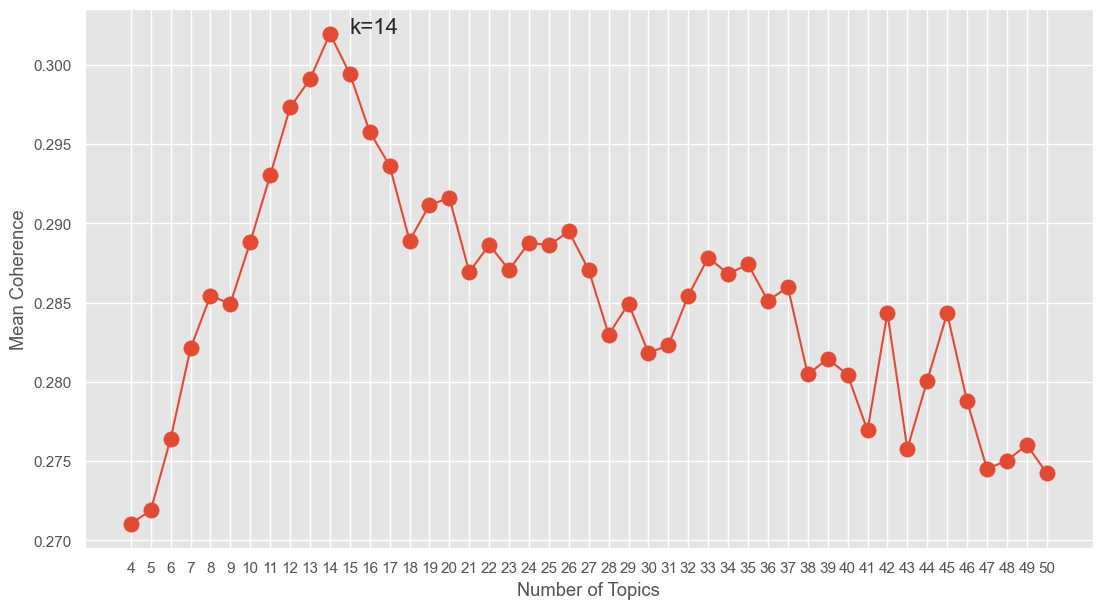

In [211]:
fig = plt.figure(figsize=(13,7))
# create the line plot
ax = plt.plot( k_values, coherences )
plt.xticks(k_values)
plt.xlabel("Number of Topics")
plt.ylabel("Mean Coherence")
# add the points
plt.scatter( k_values, coherences, s=120)
# find and annotate the maximum point on the plot
ymax = max(coherences)
xpos = coherences.index(ymax)
best_k = k_values[xpos]
plt.annotate( "k=%d" % best_k, xy=(best_k, ymax), xytext=(best_k, ymax), textcoords="offset points", fontsize=16)
# show the plot
plt.show()


In [212]:
k = best_k
# get the model that we generated earlier.
W = topic_models[k-kmin][1]
H = topic_models[k-kmin][2]

In [213]:
for topic_index in range(k):
    descriptor = get_descriptor( terms, H, topic_index, 10 )
    str_descriptor = ", ".join( descriptor )
    print("Topic %02d: %s" % ( topic_index+1, str_descriptor ) )

Topic 01: chicken, fried, rice, sauce, thai, spicy, shrimp, hot, pork, soup
Topic 02: pizza, crust, pizzas, slice, sauce, cheese, toppings, pepperoni, pie, slices
Topic 03: bar, beer, happy, hour, beers, wine, selection, night, drinks, drink
Topic 04: coffee, shop, tea, starbucks, iced, latte, cup, espresso, milk, cafe
Topic 05: sushi, roll, rolls, tuna, fish, lunch, salmon, fresh, spicy, sashimi
Topic 06: time, came, ordered, order, got, didn, table, food, just, wait
Topic 07: ice, cream, chocolate, flavors, cake, vanilla, sweet, cone, flavor, cookies
Topic 08: burger, fries, burgers, cheese, bacon, bun, onion, potato, cooked, juicy
Topic 09: salad, sandwich, lunch, cheese, bread, fresh, sandwiches, delicious, soup, grilled
Topic 10: great, food, service, place, friendly, staff, love, atmosphere, amazing, excellent
Topic 11: good, really, food, pretty, place, nice, service, like, little, decent
Topic 12: tacos, taco, mexican, salsa, chips, fish, burrito, beans, margaritas, guacamole
T